In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


4431872/4422102 [==============================] - 3s 1us/step


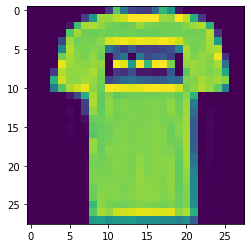

In [2]:
plt.imshow(x_train[1])

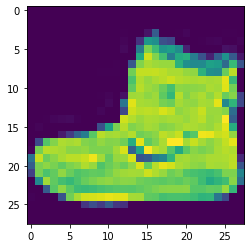

In [3]:
plt.imshow(x_train[0])

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# 28, 28 comes from width, height, 1 comes from the number of channels
# -1 means that the length in that dimension is inferred.
# This is done based on the constraint that the number of elements in an ndarray or T
# each image is a row vector (784 elements) and there are lots of such rows (let it b
# converting the training_images array to 4 dimensional array with sizes 60000, 28, 2
x_train.shape
(60000, 28, 28)
x_test.shape
(10000, 28, 28, 1)
y_train.shape
(60000,)
y_test.shape
(10000,)


(10000,)

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 128)         36992     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          7

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
# 1875 is a number of batches. By default batches contain 32 samles.60000 / 32 = 1875
# Finally, we will evaluate the performance of the model on the test data.
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.5487 - accuracy: 0.7962 - val_loss: 0.3926 - val_accuracy: 0.8634
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3501 - accuracy: 0.8730 - val_loss: 0.3209 - val_accuracy: 0.8838
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3025 - accuracy: 0.8902 - val_loss: 0.3151 - val_accuracy: 0.8823
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2790 - accuracy: 0.8981 - val_loss: 0.2948 - val_accuracy: 0.8919
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2591 - accuracy: 0.9041 - val_loss: 0.2693 - val_accuracy: 0.9001
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2429 - accuracy: 0.9087 - val_loss: 0.2747 - val_accuracy: 0.9000
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2288 - accuracy: 0.9144 - val_loss: 0.2730 -